# PuZZleDucK
Tutorial notebook

Finding out about Python:

In [8]:
import sys
print("Version: " + str(sys.version).replace("\n",  "--- "))
print("Argv[0]: " + sys.argv[0])
print("Builtin Modules: " + str(sys.builtin_module_names[1:5]))
print("Implimentation: " + sys.implementation.cache_tag)
print("Platform: " + sys.platform)
print("API: " + str(sys.api_version))

Version: 3.5.3 (default, Jan 19 2017, 14:11:04) --- [GCC 6.3.0 20170118]
Argv[0]: /usr/lib/python3/dist-packages/ipykernel/__main__.py
Builtin Modules: ('_bisect', '_codecs', '_collections', '_datetime')
Implimentation: cpython-35
Platform: linux
API: 1013


What next...
#### Latex Formula:

In [2]:
from IPython.display import display, Math, Latex
display(Math(r'\sqrt{a^2 + b^2}')) 

<IPython.core.display.Math object>

#### "Magic" Commands

In [3]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3

In [4]:
print("Hello Save file magic")
pwd = %pwd
lst = %ls
print("PWD: " + pwd)
print(str(lst))

Hello Save file magic
Day-One.ipynb  JupyterTutorial.ipynb  Results-Day-Two.ipynb
Day-Two.ipynb  README.md
images/        Results-Day-One.ipynb
PWD: /home/puzzleduck/x/data_story_telling/DatStory
None


#### Widgets

In [5]:
from ipywidgets import widgets, interact, interactive, fixed, interact_manual
from IPython.display import display

text = widgets.Text(description="Text: ", placeholder="placeholder")
display(text)
def handle_submit(sender):
    print(text.value)
text.on_submit(handle_submit)

In [6]:
button = widgets.Button(description="Click me!")
display(button)
def handle_click(sender):
    print("Click!")
button.on_click(handle_click)

In [7]:
def doubler(int):
    print(str(int) + " -> " + str(int*2))
    int*2

interact(doubler, int=10)
print()

10 -> 20



In [8]:
def negater(bool=True):
    print(str(bool) + " -> " + str(not bool))
    return not bool

interact(negater, bool=False)
print()

False -> True


True

In [9]:
def palendromer(string="eg"):
    print(string + string[-2::-1])
    text.value = string + string[-2::-1]
    return(string + string[-2::-1])

interact(palendromer, string="Word")
print()

WordroW


'WordroW'

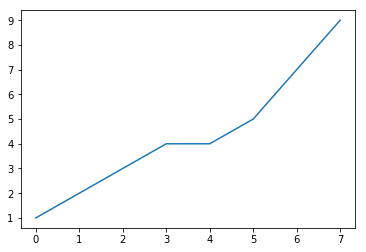

In [35]:
from IPython.html.widgets import *
from numpy import *
#import matplotlib.pyplot as plt
import pylab as plt

plt.plot([1,2,3,4,4,5,7,9])
plt.show()

In [40]:
t = arange(0.0, 1.0, 0.01)

def plotsin(f):
    plt.plot(t, sin(2*pi*t*f))
    plt.show
    
interact(plotsin, f=(1,10,0.1))

<IPython.core.display.Javascript object>


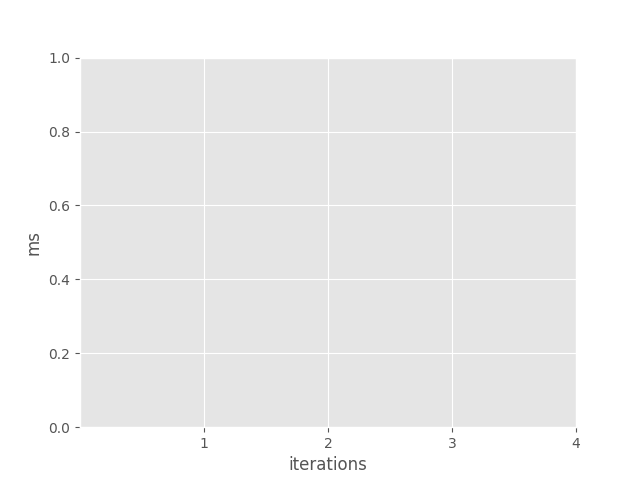

:: Prepared


In [50]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display
from IPython.html import widgets
plt.style.use('ggplot')

NUMBER_OF_PINGS = 4

# displaying the text widget
text = widgets.Text(description="Domain to ping", width=200)
display(text)

# preparing the plot 
data = pd.DataFrame()
x = range(1,NUMBER_OF_PINGS+1)
plots = dict()
fig, ax = plt.subplots()
plt.xlabel('iterations')
plt.ylabel('ms')
plt.xticks(x)
plt.show()

# preparing a container to put in created checkbox per domain
checkboxes = []
cb_container = widgets.HBox()
display(cb_container)

# add button that updates the graph based on the checkboxes
button = widgets.Button(description="Update the graph")

# function to deal with the added domain name
def handle_submit(sender):
    print(":: Domain")
    # a part of the magic inside python : pinging
    res = !ping -c {NUMBER_OF_PINGS} {text.value}
    hits = res.grep('64 bytes').fields(-2).s.replace("time=","").split()
    if len(hits) == 0:
        print("Domain gave error on pinging")
    else:
         # rebuild plot based on ping result
        data = hits
        print(":: Data: " + str(data))
#        data = data[0].astype(float)
        plots, = ax.plot(x, data, label=text.value)
        plt.legend()
        plt.draw()
        # add a new checkbox for the new domain
        checkboxes.append(widgets.Checkbox(description = text.value, value=True, width=90))
        cb_container.children=[i for i in checkboxes]
        if len(checkboxes) == 1:
            display(button)

# function to deal with the checkbox update button       
def on_button_clicked(b):
    print(":: Clicked")
    for c in cb_container.children:
        if not c.value:
            plots.set_visible(False)
        else:
            plots.set_visible(True)
    plt.legend()
    plt.draw()

button.on_click(on_button_clicked)
text.on_submit(handle_submit)
print(":: Prepared")
plt.show()


In [9]:
import csv
f=open("clean-welfare.csv")
#tweet_list = csv.reader(f)
tweet_list = []
for row in csv.reader(f):
    tweet_list.append(row)
    
print(row)

['RT @rcooley123: Ignoring the Real Spending Problem: Tax Cuts for the Rich and Corporate Welfare  \nhttps://t.co/uRyHteS5YF']

In [11]:

tweet_list[:12]

[["RT @kwilli1046: RT if you want Trump to start enforcing a law that's been on the books for 100 years: deporting illegals on welfare! https:…"],
 ["@delemohRIP @Tigerkid777 U get welfare cheques every month kid, go fool some 12yo, I'm not falling for it."],
 ['RT @rcooley123: Ignoring the Real Spending Problem: Tax Cuts for the Rich and Corporate Welfare  \nhttps://t.co/uRyHteS5YF'],
 ['RT @ShreeRadhey3: @ChoudhurySalona @narendramodi @RashtrapatiBhvn #SocialServiceByHinduSaints by conducting extensive work in health care,…'],
 ['RT @den2114: Sharia Australia – The More Wives You Have, The More You Get Welfare Benefits @PeterDutton_MP we have become a joke https://t.…'],
 ['RT @joshgnosis: SBS killed off a pre-Budget scoop on the drug testing for welfare trial in exchange for an interview with the PM. https://t…'],
 ['@ScottPresler @nancy_faust The illegals and the welfare losers all need to... be cut off! Fuck them all!The FREEBIE GAME IS OVER LAZY FUCKS!'],
 ['@ChoudhurySalona @nar

#### Importing:

In [1]:
import pandas as pd
import numpy as np

In [3]:
import tweepy

ImportError: No module named 'tweepy'